<a href="https://colab.research.google.com/github/eksq1/dodo/blob/main/inclass/%EC%88%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%ED%95%99%EA%B3%BC_20231569%EA%B9%80%EA%B0%80%EC%9D%84_12%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C2(%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install konlpy

# NLP : Natural Language Processing
from konlpy.corpus import kolaw

corpus = open('/content/sample_data/UN.txt').read()
print(len(corpus))
print(corpus[:100])

2105
존경하는 국민 여러분, 유엔군 참전용사 가족과 내외 귀빈 여러분!
오늘은 한국전쟁 정전 68주년이자 아홉 번째 맞는 유엔군 참전의 날입니다.
유엔은 창설 이후 처음으로 한국전쟁에 


In [20]:
# 텍스트 정제
import re

def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'   # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'                                   # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '([a-zA-Z0-9]+)'                                    # 알파벳, 숫자 제거
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'                                          # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'                                           # 특수기호제거
    text = re.sub(pattern, '', text)
    return text

In [21]:
corpus = text_clean(corpus)
corpus[:2105]

'존경하는 국민 여러분 유엔군 참전용사 가족과 내외 귀빈 여러분\n오늘은 한국전쟁 정전 주년이자 아홉 번째 맞는 유엔군 참전의 날입니다\n유엔은 창설 이후 처음으로 한국전쟁에 참전해 연대와 협력이 한 나라의 자유와평화를 지킬 수 있다는 것을 세계 역사에 깊이 각인했습니다 코로나로 인해연대와 협력의 소중함을 더 절실히 느끼고 있는 이때 유엔군 참전의 의미를 되새기게 되어 매우 뜻깊습니다\n오늘 우리는 특별한 손님을 맞았습니다 레이먼드 카폰 리 카폰  내외 캐서린 칸  님과 이매진 스미스  님입니다 카폰 내외는 한국전쟁의 예수라고 불렸던 에밀 카폰  신부님의 조카이고 캐서린 칸 님과 이매진 스미스 님은 한국전쟁에 참전했던 호주왕립연대 제대대 소대장 콜린 칸   장군님의 조카 손녀 조카 증손녀입니다 코로나의 어려움을 뚫고 먼 길을 와 주셨습니다 깊이 감사드립니다\n조금 전 학생들로부터 에밀 카폰 콜린 칸 두 영웅의 헌신적인 생애를 소개받았습니다 변성문 학생은 카폰 신부님의 정신을 잇고 있는 광주 살레시오고등학교 학생이고 원예슬 학생은 호주대사관에서 가평전투장학금을 지원하고 있는 가평고등학교 학생입니다 한국전쟁으로 맺어진 깊은 우정의 만남입니다\n저는 오늘 고故 카폰 신부님과 칸 장군께 우리 국민을 대표해 훈장을 수여합니다 그동안 유엔군 참전의 날에 국무총리가 수여했는데 오늘은 제가 역대 대통령 최초로 영광스러운 임무를 수행하게 되었습니다 자유와 평화를 수호한 두분의 정신이 우리 국민의 마음속에 영원히 기억되길 바랍니다\n\n국민 여러분\n올해 월 신원불명 전사자들이 안장된 미국 하와이 국립태평양기념묘지에서년 만에 카폰 신부님의 유해를 찾았습니다 기적 같은 일입니다 카폰 신부님은 부상당하고 포로가 된 극한상황에서도 자유와 평화 신앙을 지키는 굳건한 용기를 보여주셨고 부상자들을 돌보고 미사를 집전하며 적군을 위해 기도하는 지극한 사랑을 실천하셨습니다 우리 국민은 신부님의 삶에서 희망의 힘을 지닌 인류애를 만날 수 있었고 신부님의 정신은 대한민국 가톨릭 군종의 뿌리가 되

In [22]:
# 형태소 분석
!apt-get update
!apt-get install -y g++ openjdk-8-jdk python3-dev python3-pip curl
!rm -rf /tmp/mecab-python-0.996       # Remove the local copy of mecab-python-0.996
!pip3 install mecab-python3            # Install the latest version of mecab-python3
!pip3 install --upgrade konlpy          # Reinstall konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [23]:
# 형태소 분석
from konlpy.tag import Okt

okt = Okt()
tokens = okt.nouns(corpus)

print(tokens[:80])

['존경', '국민', '여러분', '유엔군', '참전용사', '가족', '내외', '귀빈', '여러분', '오늘', '한국', '전쟁', '정전', '주년', '이자', '아홉', '유엔군', '참전', '날', '유엔', '창설', '이후', '처음', '한국', '전쟁', '참전', '연대', '협력', '나라', '자유', '평화', '수', '것', '세계', '역사', '깊이', '각인', '코로나', '연대', '협력', '더', '절실', '때', '유엔군', '참전', '의미', '매우', '뜻', '오늘', '우리', '손님', '레이먼', '드', '카폰', '리', '카폰', '내외', '캐서린', '칸', '님', '이매진', '스미스', '님입니', '카폰', '내외', '한국', '전쟁', '예수', '에밀', '카폰', '신부', '조카', '캐서린', '칸', '님', '이매진', '스미스', '님', '한국', '전쟁']


In [24]:
# 불용어 처리(stopwords) 및 한자 이상 단어 추출
stop_words = "기타 헌법"
stop_words = stop_words.split(" ")

st_tokens = []
for token in tokens:
  if token not in stop_words:
    st_tokens.append(token)

tokens = st_tokens    # 변수의 편의성을 위해 다시 tokens로 변수명을 바꿔줌.

tokens = [token for token in tokens if len(token) > 1]
print(tokens[:80])

['존경', '국민', '여러분', '유엔군', '참전용사', '가족', '내외', '귀빈', '여러분', '오늘', '한국', '전쟁', '정전', '주년', '이자', '아홉', '유엔군', '참전', '유엔', '창설', '이후', '처음', '한국', '전쟁', '참전', '연대', '협력', '나라', '자유', '평화', '세계', '역사', '깊이', '각인', '코로나', '연대', '협력', '절실', '유엔군', '참전', '의미', '매우', '오늘', '우리', '손님', '레이먼', '카폰', '카폰', '내외', '캐서린', '이매진', '스미스', '님입니', '카폰', '내외', '한국', '전쟁', '예수', '에밀', '카폰', '신부', '조카', '캐서린', '이매진', '스미스', '한국', '전쟁', '참전', '호주', '연대', '대대', '소대장', '콜린', '장군', '조카', '손녀', '조카', '증손녀', '코로나', '어려움']


In [25]:
# 단어 빈도수 측정
from collections import Counter

nouns_counter = Counter(tokens)
top_nouns = dict(nouns_counter.most_common(50))    # 딕셔너리 형태로 상위 50개 저장
top_nouns

{'카폰': 13,
 '신부': 13,
 '한국': 9,
 '참전용사': 8,
 '전쟁': 8,
 '장군': 8,
 '호주': 7,
 '국민': 6,
 '오늘': 6,
 '참전': 6,
 '우리': 6,
 '여러분': 5,
 '유엔군': 5,
 '연대': 5,
 '학생': 5,
 '정신': 5,
 '내외': 4,
 '헌신': 4,
 '가족': 3,
 '유엔': 3,
 '협력': 3,
 '자유': 3,
 '평화': 3,
 '코로나': 3,
 '조카': 3,
 '가평': 3,
 '훈장': 3,
 '수여': 3,
 '대한민국': 3,
 '존경': 2,
 '귀빈': 2,
 '이자': 2,
 '나라': 2,
 '깊이': 2,
 '캐서린': 2,
 '이매진': 2,
 '스미스': 2,
 '에밀': 2,
 '소대장': 2,
 '콜린': 2,
 '감사': 2,
 '영웅': 2,
 '생애': 2,
 '고등학교': 2,
 '기억': 2,
 '미국': 2,
 '부상': 2,
 '적군': 2,
 '위해': 2,
 '인류': 2}

In [26]:
# 코랩에 한글 폰트(나눔바른고딕설치)
!apt -qq -y install fonts-nanum     # -qq:메시지를 출력하지 않음(오류 제외), -y: 모든 질문 표시 없이 예라고 답하기

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.


In [27]:
# matplotlib에서 한글 폰트를 사용할 수 있도록 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 높은 해상도로 �폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
#font_path='./font/NanumBarunGothic.ttf'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # NanumBareunGothic을 NanumBarunGothic으로 변경

# 폰트 캐시 업데이트
#!fc-cache -fv

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name()

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

# 폰트 매니저 리빌딩 (선 선택적)
#fm._rebuild()  # fm으로 변경

mpl.rcParams['font.family'] = font_name

([<matplotlib.axis.YTick at 0x7ae19bb5d840>,
 [Text(0, 0, '카폰'),
  Text(0, 1, '신부'),
  Text(0, 2, '한국'),
  Text(0, 3, '참전용사'),
  Text(0, 4, '전쟁'),
  Text(0, 5, '장군'),
  Text(0, 6, '호주'),
  Text(0, 7, '국민'),
  Text(0, 8, '오늘'),
  Text(0, 9, '참전'),
  Text(0, 10, '우리'),
  Text(0, 11, '여러분'),
  Text(0, 12, '유엔군'),
  Text(0, 13, '연대'),
  Text(0, 14, '학생'),
  Text(0, 15, '정신'),
  Text(0, 16, '내외'),
  Text(0, 17, '헌신'),
  Text(0, 18, '가족'),
  Text(0, 19, '유엔'),
  Text(0, 20, '협력'),
  Text(0, 21, '자유'),
  Text(0, 22, '평화'),
  Text(0, 23, '코로나'),
  Text(0, 24, '조카'),
  Text(0, 25, '가평'),
  Text(0, 26, '훈장'),
  Text(0, 27, '수여'),
  Text(0, 28, '대한민국'),
  Text(0, 29, '존경'),
  Text(0, 30, '귀빈'),
  Text(0, 31, '이자'),
  Text(0, 32, '나라'),
  Text(0, 33, '깊이'),
  Text(0, 34, '캐서린'),
  Text(0, 35, '이매진'),
  Text(0, 36, '스미스'),
  Text(0, 37, '에밀'),
  Text(0, 38, '소대장'),
  Text(0, 39, '콜린'),
  Text(0, 40, '감사'),
  Text(0, 41, '영웅'),
  Text(0, 42, '생애'),
  Text(0, 43, '고등학교'),
  Text(0, 44, '기억'),
  Text(

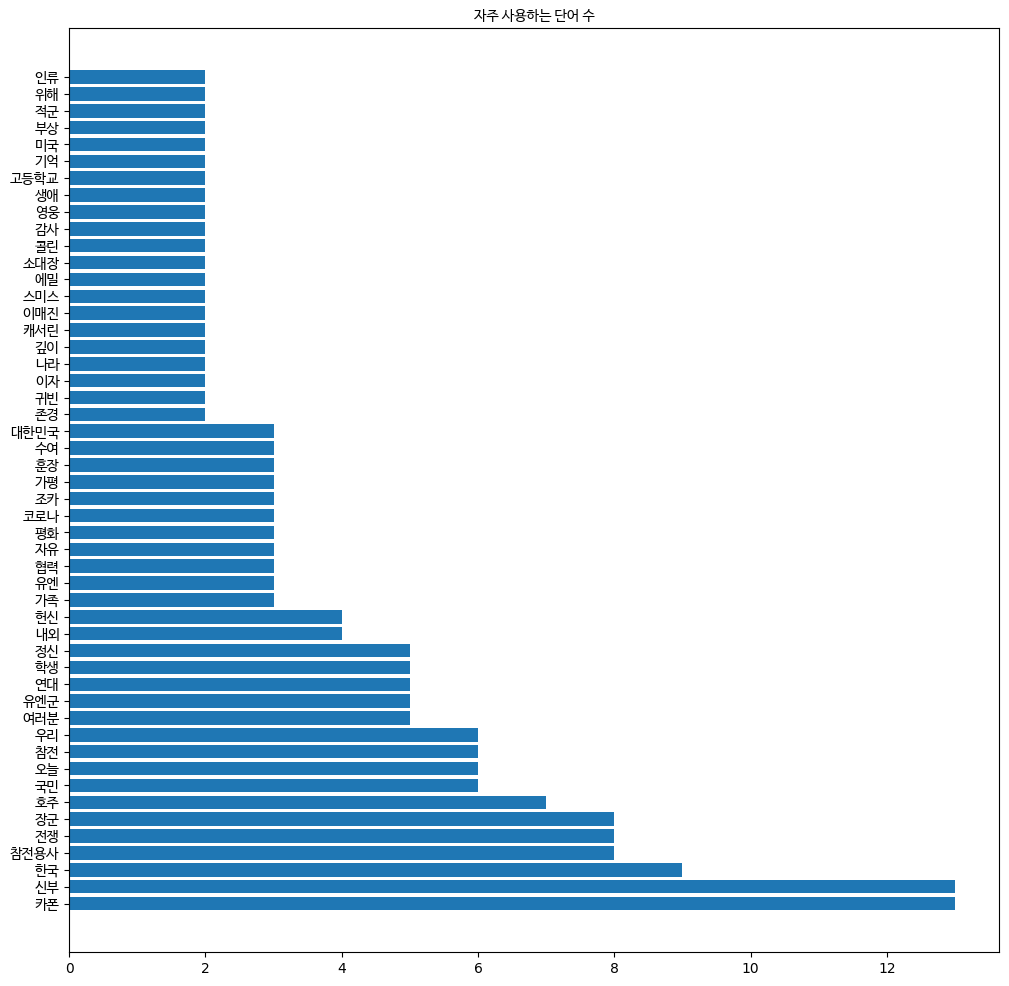

In [28]:
# 빈도 막대 그래프

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(top_nouns))       # y축 높이 지정
plt.barh(y_height, top_nouns.values())     # 수평막대 그리기

# 이전 셀에서 정의한 font_name을 사용하거나 FontProperties 객체를 새로 생성합니다.
# 여기서는 이전 셀에서 사용한 fontpath를 다시 사용하여 FontProperties 객체를 생성합니다.
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=10)

plt.title("자주 사용하는 단어 수", fontproperties=fontprop)      #  차트 제목 설정
plt.yticks(y_height, top_nouns.keys(), fontproperties=fontprop)     #  y축 틱에 label 붙이기

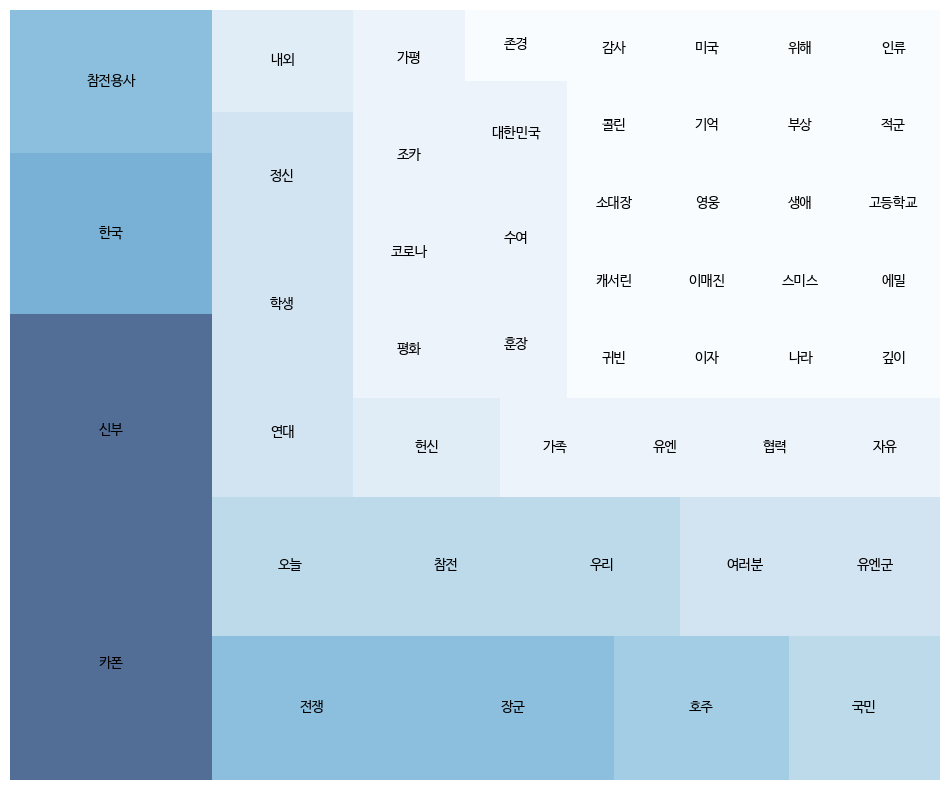

In [30]:
# squarify 트리맵

!pip install squarify

import squarify

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=10)

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

# squarify 플랏생성 (label 단어, 박스 크기는 빈도, 색깔은 cm.Blue, 투명도는 70%)
squarify.plot(sizes=top_nouns.values(),
              label=top_nouns.keys(),
              color=colors,
              alpha=.7,
              text_kwargs={'fontproperties': fontprop})  # fontprop 적용

plt.axis('off') # 축 제거

plt.show()

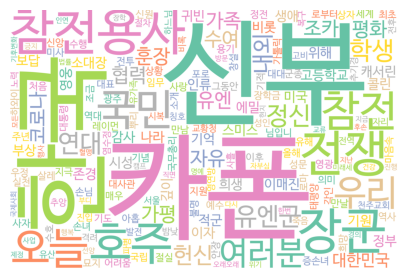

In [31]:
#Wordcloud (네모)
!pip install wordcloud STOPWORDS

from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS from wordcloud
import matplotlib.pyplot as plt

# 배경색과 폰트지정

wc= WordCloud(width = 3000, height = 2000, random_state=1,
              background_color='white', colormap='Set2',
              collocations=False, stopwords = STOPWORDS, # Now STOPWORDS is defined
              font_path='./font/NanumBarunGothic.ttf')

# 워드클라우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(5, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()

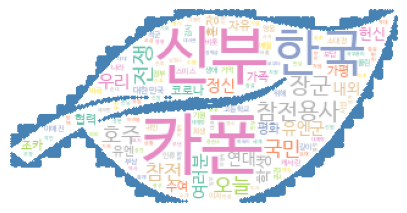

In [32]:
#Wordcloud (그림)
!pip install wordcloud STOPWORDS

from wordcloud import WordCloud, STOPWORDS  # Import STOPWORDS from wordcloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *


# 배경색과 폰트지정

cand_mask=np.array(Image.open('/content/sample_data/leaf.jpg'))

wc= WordCloud(width = 3000, height = 2000, random_state=1,
              background_color='white', colormap='Set2',
              collocations=False, stopwords = STOPWORDS, # Now STOPWORDS is defined
              mask=cand_mask, contour_width=3, contour_color='steelblue',
              font_path='./font/NanumBarunGothic.ttf')

# 워드클아우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(5, 5))
plt.imshow(wc)
plt.axis("off")
plt.show()